## Analisis Dataset Bike Sharing
Oleh: Fitran Alfian Nizar


In [58]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [59]:
# Load data

hourly_data = pd.read_csv("data/hour.csv")
hourly_data["dteday"] = pd.to_datetime(hourly_data["dteday"])
hourly_data.head()
# hourly_data.describe(include="all")
hourly_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Data sudah bersih, tidak ada duplikat, null, ataupun NaN**

## Visualisasi waktu puncak perentalan sepeda

In [60]:
# Peak hour for each day

peak_hours = hourly_data.loc[hourly_data.groupby("dteday")["cnt"].idxmax(), ["dteday" ,"hr"]]
peak_counts = peak_hours['hr'].value_counts().sort_index()
print(peak_counts)



hr
0       2
7       1
8     145
10      3
11      4
12     45
13     62
14     35
15     44
16     27
17    279
18     79
19      2
21      2
22      1
Name: count, dtype: int64


### Jumlah Puncak perentalan Sepeda
**Pertanyaan:**
- Dari data tersebut, pukul berapa yang paling sering menjadi waktu dengan perentalan sepeda tertinggi?
- Apakah ada perbedaan jumlah waktu tertinggi pada hari bekerja (Working Days) dan bukan?


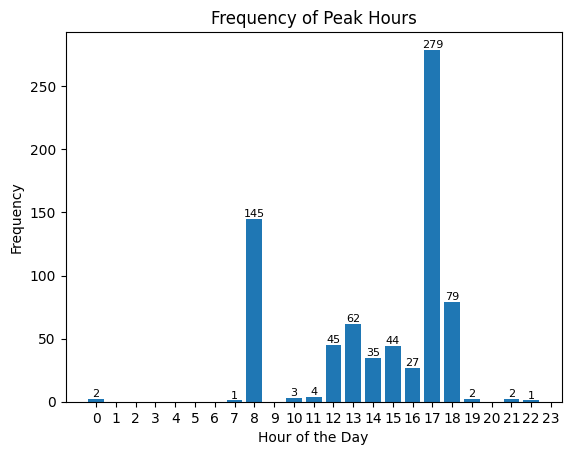

In [61]:
# Bar diagram
bars = plt.bar(peak_counts.index, peak_counts.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.title("Frequency of Peak Hours")
plt.xticks(range(0,24))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=8, color="black" )

plt.show()



In [62]:
data_workingday = hourly_data[hourly_data['workingday'].between(1,1)]
peak_hour_workingday = data_workingday.loc[
    data_workingday.groupby("dteday")['cnt'].idxmax(), 
    ['dteday', 'hr', 'cnt']]

peak_counts_workingday = peak_hour_workingday['hr'].value_counts().sort_index()

print(peak_counts_workingday.sum())


500


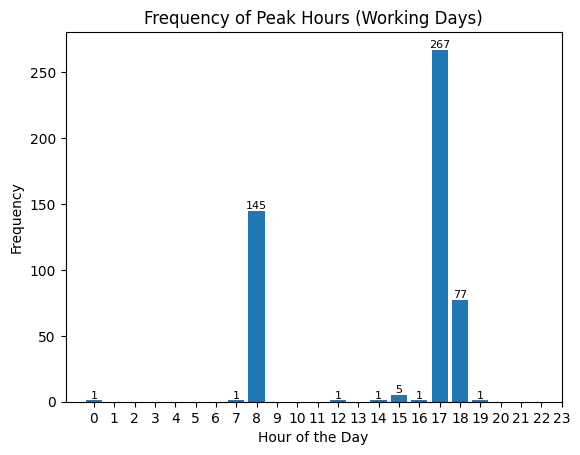

In [63]:
# Bar diagram for working days
bars2 = plt.bar(peak_counts_workingday.index, peak_counts_workingday.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.title("Frequency of Peak Hours (Working Days)")
plt.xticks(range(0,24))

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=8, color="black" )


plt.show()

In [64]:
data_offday = hourly_data[hourly_data['workingday'].between(0,0)]
peak_hour_offday = data_offday.loc[
    data_offday.groupby("dteday")['cnt'].idxmax(), 
    ['dteday', 'hr', 'cnt']]

peak_counts_offday = peak_hour_offday['hr'].value_counts().sort_index()

print(peak_counts_offday.sum())


231


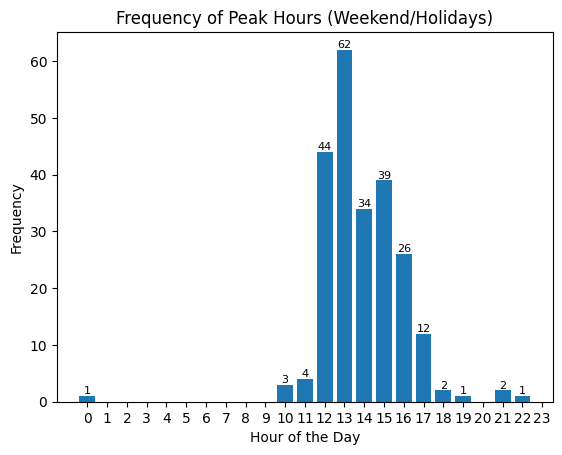

In [65]:
# Bar diagram for holidays and weekends
bars3 = plt.bar(peak_counts_offday.index, peak_counts_offday.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.title("Frequency of Peak Hours (Weekend/Holidays)")
plt.xticks(range(0,24))
for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=8, color="black" )

plt.show()

Dari diagram tersebut, terlihat bahwa perentalan sepeda terbanyak terjadi pada pukul 17.00, namun berubah-ubah tergantung apakah hari tersebut merupakan hari libur atau bukan.
- Pada hari bekerja (Working days), perentalan terbanyak terjadi pada pukul 17.00, diikuti oleh pukul 08.00, dan 18.00. Ini sejalan dengan waktu masuk dan pulang kerja.
- Pada hari libur, perentalan sepeda mulai terlihat dari pukul 10 sampai puncaknya di pukul 13.

### Korelasi Keadaan Cuaca Terhadap Jumlah perental Sepeda
Berikut adalah korelasi dari kolom data `temp`, `hum`, `windspeed`, `season`, `weathersit`, dan `cnt`

**Pertanyaan**:
- Bagaimana Korelasi antara keadaan cuaca terhadap jumlah rental sepeda?
- Bagaimana pengaruh keadaan cuaca terhadap jumlah rental sepeda?

In [69]:
daily_data = pd.read_csv("data/day.csv")
features = ['temp', 'hum', 'windspeed', 'season', 'weathersit']
target = ["cnt"]
x_data = daily_data[features+target]
x_data["temp_actual"] = x_data["temp"].mul(41)
x_data["hum_actual"] = x_data["hum"].mul(100)
x_data["windspeed_actual"]= x_data['windspeed'].mul(67)

features_actual = ['temp_actual', 'hum_actual', 'windspeed_actual', 'season', 'weathersit',]
x = sm.add_constant(x_data[features_actual])
y = daily_data[target]

print(x)


     const  temp_actual  hum_actual  windspeed_actual  season  weathersit
0      1.0    14.110847     80.5833         10.749882       1           2
1      1.0    14.902598     69.6087         16.652113       1           2
2      1.0     8.050924     43.7273         16.636703       1           1
3      1.0     8.200000     59.0435         10.739832       1           1
4      1.0     9.305237     43.6957         12.522300       1           1
..     ...          ...         ...               ...     ...         ...
726    1.0    10.420847     65.2917         23.458911       1           2
727    1.0    10.386653     59.0000         10.416557       1           2
728    1.0    10.386653     75.2917          8.333661       1           2
729    1.0    10.489153     48.3333         23.500518       1           1
730    1.0     8.849153     57.7500         10.374682       1           2

[731 rows x 6 columns]


C:\Users\fitra\AppData\Local\Temp\ipykernel_20236\3771234564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["temp_actual"] = x_data["temp"].mul(41)
C:\Users\fitra\AppData\Local\Temp\ipykernel_20236\3771234564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data["hum_actual"] = x_data["hum"].mul(100)
C:\Users\fitra\AppData\Local\Temp\ipykernel_20236\3771234564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

- `temp` dikali 41 untuk menjadi nilai aslinya, dan hasilnya disimpan di `temp_actual`
- `hum` dikali 100 untuk menjadi nilai aslinya, dan hasilnya disimpan di `hum_actual`
- `windspeed` dikali 67 untuk menjadi nilai aslinya, dan hasilnya disimpan di `windspeed_actual`



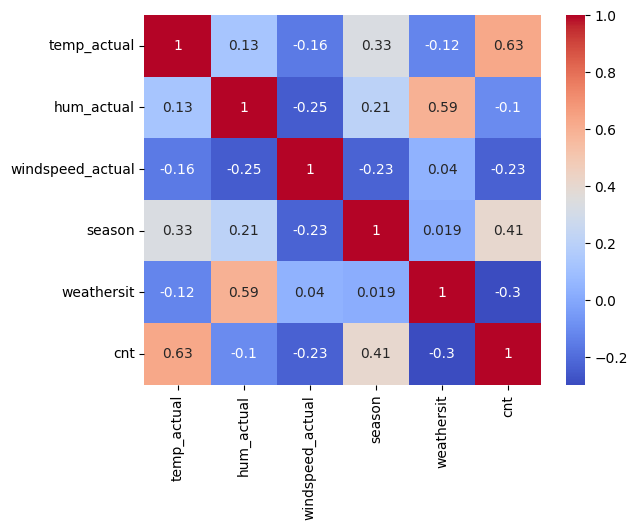

In [70]:
# Heatmap
sns.heatmap(x_data[features_actual+target].corr( ), annot=True, cmap="coolwarm")
plt.show()

Dari gambar heatmap di atas dapat diambil kesimpulan sebagai berikut:
- Korelasi terbesar ada pada temperatur terhadap jumlah perental sepeda (`temp` terhadap `cnt`), musim terhadap jumlah perental sepeda (`season` terhadap `cnt`), dan keadaan cuaca terhadap jumlah perental sepeda (`weathersit` terhadap `cnt`).
- Korelasi kelembapan, keadaan cuaca, dan kecepatan angin terhadap jumlah pengguna sepeda adalah berbanding terbalik. Sehingga jika kelembaban, kecepatan angin, atau keadaan cuaca meningkat, maka jumlah pengguna sepeda akan menurun, dan sebaliknya.

### Prediksi Menggunakan Regresi Linear

In [68]:
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     155.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          2.32e-112
Time:                        19:51:54   Log-Likelihood:                -6302.9
No. Observations:                 731   AIC:                         1.262e+04
Df Residuals:                     725   BIC:                         1.265e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3446.0118    327.432  

Dari hasil tersebut, dapat disimpulkan bahwa:
- Dengan nilai p < 0.001, `temp_actual` memiliki pengaruh terhadap `cnt` dengan setiap `temp_actual` naik 1 nilai, akan **menambah** nilai `cnt` sebanyak `137.3365`.
- Dengan nilai p < 0.001, `hum_actual` memiliki pengaruh yang signifikan dengan setiap `hum_actual` naik 1 nilai, akan **mengurangi** nilai `cnt` sebanyak `23.4333`.
- Dengan nilai p < 0.001, `windspeed_actual` memiliki pengaruh yang signifikan dengan setiap `windspeed_actual` naik 1 nilai, akan **mengurangi** `cnt` sebanyak `49.9644`.
- Dengan nilai p < 0.001, `season` memiliki pengaruh signifikan dengan setiap `season` naik 1 nilai, akan **menambah** `cnt` sebanyak `409.6396` (nilai season berada di rentang 1-4 dengan 1 adalah **spring**, 2 adalah **summer**, 3 adalah **fall**, dan 4 adalah **winter**).
- Dengan nilai p < 0.001, `weathersit` memiliki pengaruh yang signifikan dengan setiap `weathersit` naik 1 nilai, akan **mengurangi** `cnt` sebanyak `471.3983` (nilai season berada di rentang 1-4 dengan 1 adalah **cerah**, 2 adalah **berkabut**, 3 adalah **hujan/salju ringan**, dan 4 adalah **hujan/salju lebat**).
- Dengan nilai p < 0.001, `hr` memiliki pengaruh yang signifikan dengan setiap `hr` naik 1 nilai, akan **menambah** nilai `cnt` sebanyak `7.4553`.

Sehingga, terlihat bahwa keadaan cuaca berpengaruh terhadap jumlah rental sepeda.